In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.draw import rectangle_perimeter
from path_to_folders import images_path, labels_path

#### Path to sempl files

In [2]:
image_path = f'{images_path}0.jpg'
label_path = f'{labels_path}0.txt'

#### Download image and read labels

In [3]:
image = imread(image_path)

with open(label_path, 'r') as lb:
    labels = lb.read().strip().split('\n')

### Convert labels into coordinates of rectangles

In [4]:
rects = []
for label in labels:
    class_id, x_center, y_center, width, height = map(float, label.split(' '))
    x_center *= image.shape[1]
    y_center *= image.shape[0]
    width *= image.shape[1]
    height *= image.shape[0]
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)
    rects.append((y_min, x_min, y_max, x_max))


### Display image and markup

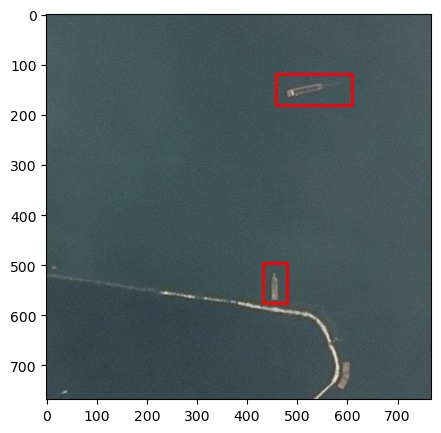

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(image)
for rect in rects:
    rr, cc = rectangle_perimeter(start=(rect[0], rect[1]), end=(rect[2], rect[3]), shape=image.shape)
    plt.plot(cc, rr, '-r', linewidth=2)
plt.show()
